<a href="https://colab.research.google.com/github/qoo556625/Aune-web-crawler-/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import json
import requests
import pandas as pd
import jieba
import os
from urllib.request import urlretrieve

fulltext = ""
f = open("fulltext", "w", encoding="utf-8")

url = "https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big"
dicname = "dict.txt.big"
jieba.load_userdict("dict.stock")
if not os.path.exists(dicname):
    urlretrieve(url, dicname)
jieba.set_dictionary("dict.txt.big")

for i in range(11):
    print("page:", i+1)

    url='https://api.cnyes.com/media/api/v1/newslist/category/tw_stock?startAt=1612886400&endAt=1613836799&limit=30&page='+str(i+1)

    response = requests.get(url)
    news = json.loads(response.text)["items"]['data']

    for new in news:
        new_id = new["newsId"]
        post = "https://news.cnyes.com/news/id/"+str(new_id)+"?exp=a"
        print(new["title"])
        # print(post)
        print("--" *10)
        jieba.del_word('億元')
        jieba.del_word('超個')
        jieba.del_word('去年')
        jieba.del_word('今年')
        fulltext = fulltext + " " + " ".join(jieba.cut(new["title"]))
        f.write(fulltext)


page: 1


Building prefix dict from /content/dict.txt.big ...
Loading model from cache /tmp/jieba.u501edca284da514cb68b53a20324f4e3.cache


2月電視面板平均漲幅達5% 漲勢可望延續至Q2
--------------------


Loading model cost 1.448 seconds.
Prefix dict has been built successfully.


封裝材料需求旺 長華*1月純益年增83% 每股賺0.13元
--------------------
漲價效應顯 敦泰1月純益跳增11倍 每股賺1.08元
--------------------
應材看半導體進入逾十年投資週期 上銀、大銀啖設備擴產商機
--------------------
品牌雙A宏碁、華碩競推新品 助推上半年營運
--------------------
〈主計經濟預測〉我國去年Q4 GDP衝破5% 創9年半來單季新高
--------------------
〈主計經濟預測〉我GDP規模將首次突破20兆元 經濟成長率4字頭7年來首見
--------------------
工作天數增加 南僑1月稅後純益年增22.45% EPS 0.42元
--------------------
〈熱門股〉保護元件飆 聚鼎、富致股價雙雙續寫新高
--------------------
麗臺去年終結連4年虧損 每股賺0.5元 1月EPS 0.43元
--------------------
去年經濟成長稅收卻衰退 財政部點出三大原因
--------------------
亞光營運延續上季榮景 1月轉虧為盈 EPS 0.3元
--------------------
東洋反擊網路節目 對不實指控保留法律追訴權
--------------------
疫情衝擊 國內去年結婚數降至12.1萬對 創近10年新低
--------------------
光罩1月純益年增3倍 單月EPS 0.72元賺贏去年上半年
--------------------
音效晶片出貨旺 驊訊去年虧轉盈 EPS 2.44元 創歷史新高
--------------------
白宮顧問致函感謝解決車用晶片問題 王美花證實已收到信件
--------------------
〈鴻海新春開工〉印度營收隨大客戶擴大投資成長 美國威州6月前簽新合約
--------------------
〈郭台銘挺生醫〉台灣具備質好量多人才 政府扶植有望成為護國群山
--------------------
看好公司營運 宇瞻總座帶頭加碼股票 內部人股權單月大增3%
--------------------
年後轉職潮 調查：838萬上班族不滿意待遇 平均凍薪3.8年
-------------

In [34]:
print(fulltext)

 2 月 電視 面板 平均 漲幅 達 5%   漲勢 可望 延續 至 Q2 封裝 材料 需求 旺   長 華 * 1 月 純益 年增 83%   每股 賺 0.13 元 漲價 效應 顯   敦泰 1 月 純益 跳增 11 倍   每股 賺 1.08 元 應材 看 半導體 進入 逾 十年 投資 週期   上 銀 、 大銀 啖 設備 擴產 商機 品牌 雙 A 宏碁 、 華碩 競推 新品   助推 上半年 營運 〈 主計 經濟 預測 〉 我國 去 年 Q4   GDP 衝破 5%   創 9 年半來 單季 新高 〈 主計 經濟 預測 〉 我 GDP 規模 將 首次 突破 20 兆元   經濟 成長率 4 字頭 7 年來 首見 工作 天數 增加   南僑 1 月 稅後 純益 年增 22.45%   EPS   0.42 元 〈 熱門股 〉 保護 元件 飆   聚鼎 、 富致 股價 雙雙 續寫 新高 麗臺 去 年 終結 連 4 年 虧損   每股 賺 0.5 元   1 月 EPS   0.43 元 去 年 經濟 成長 稅收 卻 衰退   財政部 點出 三大 原因 亞光 營運 延續 上 季榮景   1 月 轉虧 為盈   EPS   0.3 元 東洋 反擊 網路 節目   對 不實 指控 保留 法律 追訴權 疫情 衝擊   國內 去 年 結婚 數降 至 12.1 萬對   創近 10 年 新低 光罩 1 月 純益 年增 3 倍   單月 EPS   0.72 元 賺 贏去 年 上半年 音效 晶片 出貨 旺   驊訊 去 年 虧 轉盈   EPS   2.44 元   創 歷史 新高 白宮 顧問 致函 感謝 解決 車用 晶片 問題   王美花 證實 已 收到 信件 〈 鴻海 新春 開工 〉 印度 營收 隨大 客戶 擴大 投資 成長   美國 威州 6 月 前 簽新 合約 〈 郭台銘 挺 生醫 〉 台灣 具備 質好量 多 人才   政府 扶植 有望 成為 護國 群山 看好 公司 營運   宇瞻 總座 帶頭 加碼 股票   內部 人 股權 單月 大增 3% 年 後 轉職 潮   調查 ： 838 萬 上班族 不 滿意 待遇   平均 凍薪 3.8 年 〈 鴻海 新春 開工 〉 劉揚偉 ： 持續 尋找 收購 8 吋 晶圓 代工廠 的 機會 〈 鴻海 新春 開工 〉 蘋果 對外 尋求 

In [35]:
!pip install wordcloud

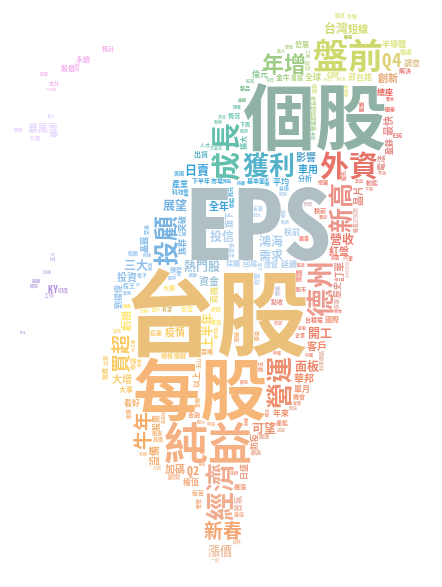

In [36]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import jieba
import matplotlib.pyplot as plt
import os
# matplotlib inline
mask_path = "map.jpg"
mask = np.array(Image.open(mask_path))

wc = WordCloud(font_path = "./NotoSansMonoCJKtc-Bold.otf",
               background_color="white", max_words=5000,
               mask=mask,collocations=False)
fulltext = open("fulltext","r",encoding="utf-8").read()

wc.generate(fulltext)

color = ImageColorGenerator(mask)
wc.recolor(color_func = color)

wc.to_file("./result_cloud.png")
wc.to_image()